## Problem Statement

**Context**
- A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

- The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.



**Objective**

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.



**Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary**:

`Booking_ID`: the unique identifier of each booking

`no_of_adults`: Number of adults

`no_of_children`: Number of Children

`no_of_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

`no_of_week_nights`: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

`type_of_meal_plan`: Type of meal plan booked by the customer:

Not Selected - No meal plan selected

Meal Plan 1 - Breakfast

Meal Plan 2 - Half board (breakfast and one other meal)

Meal Plan 3 - Full board (breakfast, lunch, and dinner)


`required_car_parking_space`: Does the customer require a car parking space? (0 - No, 1- Yes)

`room_type_reserved`: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group

`lead_time`: Number of days between the date of booking and the arrival date

`arrival_year`: Year of arrival date

`arrival_month`: Month of arrival date

`arrival_date`: Date of the month

`market_segment_type`: Market segment designation.

`repeated_guest`: Is the customer a repeated guest? (0 - No, 1- Yes)

`no_of_previous_cancellations`: Number of previous bookings that were canceled by the customer prior to the current booking

`no_of_previous_bookings_not_canceled`: Number of previous bookings not canceled by the customer prior to the current booking

`avg_price_per_room`: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

`no_of_special_requests`: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

`booking_status`: Flag indicating if the booking was canceled or not.

**EDA Questions**

1. What are the busiest months in the hotel?

2.   Which market segment do most of the guests come from?
3.   Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

4.   What percentage of bookings are canceled?
5.   Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6.   Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**Note**: These are a few questions to help guide you in performing EDA. EDA has to be done beyond this set of questions to obtain the maximum point in the corresponding rubric section.

## Loading Libraries

In [31]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# Library for scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# To build model for prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

## Loading data

In [3]:
'''
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
from google.colab import drive
drive.mount('/content/drive/') #/Colab_notebooks/Python_Files
'''
data = pd.read_csv("\\Users\\2211563\\Downloads\\INNHotelsGroup.csv")

In [17]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Overview of the data

### View the first and last 5 rows of the dataset.

In [ ]:
df.head()

In [ ]:
df.tail()

### Understand the shape of the dataset.

In [ ]:
df.shape

### Check the data types of the columns for the dataset.

In [ ]:
df.info()

* Dependent variable is the booking status which is of categorical type.
* Booking id, meal plan type, room reservation type, and market segment are of categorical and market segment is float type while other variables are of integer type.
* There are no missing values in the dataset.

### Checking for duplicate values

In [ ]:
df.duplicated().sum()

- There are no duplicate values in the dataset.

### Checking for missing values

In [ ]:
df.isnull().sum()

- There are no null values in the dataset.

### Statistical summary

In [ ]:
df.describe().T

* `no_of_week_nights`: Average no of week nights are 2.2. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `lead_time`: The mean number of days between the date of booking and the arrival date is 85.23. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `avg_price_per_room`: The average price per room is 103.42 in euros. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `No_of_previous_booking_not_cancelled`: There's a huge difference in the 75th percentile and maximum value of No_of_previous_booking_not_cancelled indicating the presence of outliers. Also, 75% of the observations are 0.
* `no_of_previous_cancelled`: Same as no_of_previous_cancelled there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `repeated_guest`: Same as repeated_guest there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `car_parking_space`: Same as car_parking_space there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `no_of_children`: Same as no_of_children there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.

## Find out unique values in each categorical column

In [ ]:
df['type_of_meal_plan'].unique()

In [ ]:
df['room_type_reserved'].unique()

In [ ]:
df['market_segment_type'].unique()

In [ ]:
df['booking_status'].unique()

- There are six different types of rooms available.
- Meal plans come in three types, with an option for guests to not select a meal plan.
- There are five different market segments.
- Booking statuses are either cancelled or not cancelled.

In [ ]:
df['no_of_previous_cancellations'].unique()

In [ ]:
df['no_of_previous_bookings_not_canceled'].unique()

## Exploratory Data Analysis (EDA) Summary

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with percentiles

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Crosstab for counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Crosstab for normalized (percentile) values
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plotting
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Annotate with percentiles
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x()
        y = p.get_y()
        if height > 0:
            ax.annotate(f'{height*100:.1f}%', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='white')

    plt.show()

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Observations on no of adults

In [ ]:
histogram_boxplot(df, "no_of_adults", bins=50)

- The majority of bookings were for two adults, totaling over 25,000.
- Bookings for three adults were minimal (around 2,500), and bookings for one adult were about 7,500.
- The boxplot indicates that bookings with zero, one, and three adults are outliers.
- It's important to investigate the reasons behind bookings with zero adults.

In [ ]:
rows_with_zero_adults = df[df['no_of_adults'] == 0]
print('There are', rows_with_zero_adults.shape[0] ,'no of records having booking with zero adults.')

- Now we will try to check if there is any booking made by children for those booking where there is no record of adults.

In [ ]:
rows_with_zero_adults['no_of_children'].unique()

- It is clear the zero no of adult's booking has some influence of children.
- We must check if those bookings were cancelled or not.

In [ ]:
rows_with_zero_adults['booking_status'].value_counts(normalize=True)

- This tells us around 31 percentile of the booking with zero adults got cancelled.

#### Observations on no of children

In [ ]:
histogram_boxplot(df, "no_of_children", bins=50)

* Most of the booking were made with zero no of child. But also seems to have outliers present in it.
* We need to check if there is any relation with multiple number of children.

In [ ]:
df[df['no_of_children']>=4]

- One or two adults with 9 to 10 children is a rare phenomenon.
- We must get more understanding on this from client.

#### Observation on no of weekend nights

In [ ]:
histogram_boxplot(df, "no_of_weekend_nights", bins=50)

- It is right skewe. As booking more than 2 weekend nights means long stay in the hotel.
- We shall check in depth to understand these bookings.

In [ ]:
stays_more_than_week=df[df['no_of_weekend_nights']> 2]
stays_more_than_week

In [ ]:
# check the ratio of cancellation for stays more than a week
stays_more_than_week['booking_status'].value_counts(normalize=True)

- We can clearly observe that booking with more than 7 days has more probability (~ 60%) of getting cancelled.
- We will try to analyze further if we can understand of getting cancelled for these bookings.

In [ ]:
stays_more_than_week[stays_more_than_week['booking_status']=='Canceled'].describe().T

In [ ]:
stays_more_than_week[stays_more_than_week['booking_status']=='Not_Canceled'].describe().T

- Probability of getting cancelled for more than a week bookings might be dependent on the price of the rooms.
- Mean observed price of room for cancelled and not cancelled bookings are 108 euros and 97 euros respectively. A little higher mean price could be observed for bookings which got cancelled with the not cancelled bookings.

In [ ]:
df.columns

#### Observations on no of week nights

In [ ]:
histogram_boxplot(df, "no_of_week_nights", bins=50)

- Seems to have outliers for the no of week day nights more than ~5.5 days.
- We can also check those outliers.

In [ ]:
stays_more_than_5_5_days=df[df['no_of_week_nights'] > 5.5]
stays_more_than_5_5_days

In [ ]:
stays_more_than_5_5_days['booking_status'].value_counts(normalize=True)

In [ ]:
stays_more_than_5_5_days[stays_more_than_5_5_days['booking_status']=='Canceled'].describe().T

In [ ]:
stays_more_than_5_5_days[stays_more_than_5_5_days['booking_status']=='Not_Canceled'].describe().T

- We can also observe here booking with more than 5.5 week nights has ~10% higher probability of getting cancelled.
- Price of rooms are likely to be the main reason for cancellation.

#### Observations on lead_time

In [ ]:
histogram_boxplot(df, "lead_time", bins=50)

- Lead time seems to be right skewed. It also have some outliers towards the right tail.

In [ ]:
# let's check why the outliers in Lead time
lead_time_outliers=df[df['lead_time'] > 290]
lead_time_outliers

In [ ]:
# Let's check the cancellation percentile for these booking
lead_time_outliers['booking_status'].value_counts(normalize=True)

- It is very clear that if the booking date is very far / prior bookings are likely to get cancelled.

#### Observation on arival month

In [ ]:
labeled_barplot(df, "arrival_month")

- October has the highest number of arrivals, followed by September and August. January and February have the lowest number of arrivals.

#### Observations on avg Price per room

In [ ]:
histogram_boxplot(df, "avg_price_per_room",bins=50)

- Distribution looks normal and slightly right skewed with outliers.
- Mean and median are almost existing at same point ~ 100-105 Euros.

In [ ]:
# Let's check the outliers
AVG_Price_outliers=df[df['avg_price_per_room'] > 200]
AVG_Price_outliers

In [ ]:
AVG_Price_outliers['booking_status'].value_counts(normalize=True)

- Outliers seems to have no influence on booking cancellation.

#### Observation on market segment

In [ ]:
labeled_barplot(df,'market_segment_type')

In [ ]:
df['market_segment_type'].value_counts(normalize = True)

- The online mode is the most dominant market segment (~64%), followed by the offline mode (29%).
- Bookings in the complimentary and aviation market segments are very few.

#### Observations on room type reserved

In [ ]:
labeled_barplot(df,'room_type_reserved')

In [ ]:
df['room_type_reserved'].value_counts(normalize = True)

- Type one rooms were booked the most (77%), followed by type four rooms (~17%). Other types of rooms had significantly fewer bookings.

#### Observation on booking status


In [ ]:
labeled_barplot(df,'booking_status')

In [ ]:
df['booking_status'].value_counts(normalize=True)

- Almost one third of the total bookings got cancelled.

### Bivariate Analysis

In [ ]:
df1=data.copy()
df1["booking_status"] = df1["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)
plt.figure(figsize=(15, 7))
sns.heatmap(df1.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


In [ ]:
sns.pairplot(df, hue="booking_status")
plt.show()

#### Bivariate market segment vs price

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='market_segment_type',y='avg_price_per_room');

- Outliers can be observed in all the market segments.

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='market_segment_type',y='avg_price_per_room',showfliers =False);

- The mean price per room for Online market segments are at the highest level.
- Further analysis will be needed to check if the cancellation probability is more or not.

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='market_segment_type',y='avg_price_per_room',hue='booking_status',showfliers =False);

- For corporate and offline bookings, the mean price per room for cancelled bookings was significantly higher compared to non-cancelled bookings.
- In contrast, online and aviation bookings exhibited nearly identical room prices regardless of whether the bookings were cancelled or not.

In [ ]:
Online_market_segment=df[df['market_segment_type']=='Online']
Online_market_segment['booking_status'].value_counts(normalize=True)

In [ ]:
Offline_market_segment=df[df['market_segment_type']=='Offline']
Offline_market_segment['booking_status'].value_counts(normalize=True)

In [ ]:
Corporate_market_segment=df[df['market_segment_type']=='Corporate']
Corporate_market_segment['booking_status'].value_counts(normalize=True)

In [ ]:
Aviation_market_segment=df[df['market_segment_type']=='Aviation']
Aviation_market_segment['booking_status'].value_counts(normalize=True)

In [ ]:
Complementary_market_segment=df[df['market_segment_type']=='Complementary']
Complementary_market_segment['booking_status'].value_counts(normalize=True)

- Online bookings have a higher probability of cancellation at 36.5%, compared to offline and aviation bookings, which have a cancellation probability of around 30%.

#### Bivariate on repeating guest

In [ ]:
repeadted_guest_list=df[df['repeated_guest']==1]
repeadted_guest_list['booking_status'].value_counts(normalize=True)

In [ ]:
stacked_barplot(df,'repeated_guest','booking_status')

- Repeat guests are less likely to cancel (1.7%) their bookings compared to new guests.
- We can also check what are the no of previous booking not cancelled and how many of them are fall in the repeated guests.

In [ ]:
previous_bookings_not_canceled=df[df['no_of_previous_bookings_not_canceled']>0]
previous_bookings_not_canceled['repeated_guest'].value_counts()

In [ ]:
previous_bookings_not_canceled[previous_bookings_not_canceled['booking_status']=='Cancelled']

- The guests who did not cancelled their bookings previously, seems to be the repeated guests who did not calcelled new bookings as well.

#### Observation on special requests

In [ ]:
special_req_list=df[df['no_of_special_requests']>0]
special_req_list['booking_status'].value_counts(normalize=True)

In [ ]:
special_req_list['no_of_previous_cancellations'].value_counts()

In [ ]:
special_req_list[special_req_list['no_of_previous_cancellations']>1].shape[0]

- Guests who make special requests are less likely to cancel their bookings. Historically, only 69 guests with special requests have cancelled their bookings. Currently, the cancellation rate for bookings with special requests is just 20%.

 # Logistic Regression

### Data Preprocessing

- We can drop 'no_of_children', 'required_car_parking_space', 'no_of_previous_cancellations','no_of_previous_bookings_not_canceled', and 'repeated_guest' as most of the observations are 0 in these variables.
- 'Booking_ID' we can drop as it is a unique value no influence can be observed.
- There are many outliers in the data which we will treat (perform capping of outliers)
  - All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.


In [18]:
# Define labeling function
def label_bookings(count):
    if count < 1:
        return 'Very Low'
    elif count <= 5:
        return 'Low'
    elif count <= 15:
        return 'Medium'
    elif count <= 30:
        return 'High'
    else:
        return 'Very High'

# Apply the labeling function to the dataframe
df['booking_label'] = df['no_of_previous_bookings_not_canceled'].apply(label_bookings)

In [19]:
# Define the function to label the data
def label_cancellations(row):
    if row['no_of_previous_cancellations'] == 0:
        return 'No Cancellations'
    elif row['no_of_previous_cancellations'] <= 5:
        return 'Few Cancellations'
    elif row['no_of_previous_cancellations'] <= 10:
        return 'Moderate Cancellations'
    else:
        return 'Frequent Cancellations'

# Apply the labeling function
df['cancellation_label'] = df.apply(label_cancellations, axis=1)

In [20]:
df['repeated_guest'] = df['repeated_guest'].map({0: 'No', 1: 'Yes'})

In [21]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_label,cancellation_label
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,No,0,0,65.00,0,Not_Canceled,Very Low,No Cancellations
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,No,0,0,106.68,1,Not_Canceled,Very Low,No Cancellations
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,No,0,0,60.00,0,Canceled,Very Low,No Cancellations
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,No,0,0,100.00,0,Canceled,Very Low,No Cancellations
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,No,0,0,94.50,0,Canceled,Very Low,No Cancellations
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,No,0,0,115.00,1,Canceled,Very Low,No Cancellations
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,No,0,0,107.55,1,Not_Canceled,Very Low,No Cancellations
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,No,0,0,105.61,1,Not_Canceled,Very Low,No Cancellations
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,No,0,0,96.90,1,Not_Canceled,Very Low,No Cancellations
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,No,0,0,133.44,3,Not_Canceled,Very Low,No Cancellations


In [22]:
df.drop(['no_of_children', 'Booking_ID', 'required_car_parking_space','no_of_previous_cancellations','no_of_previous_bookings_not_canceled'], axis=1, inplace=True)

#### Outlier Detection

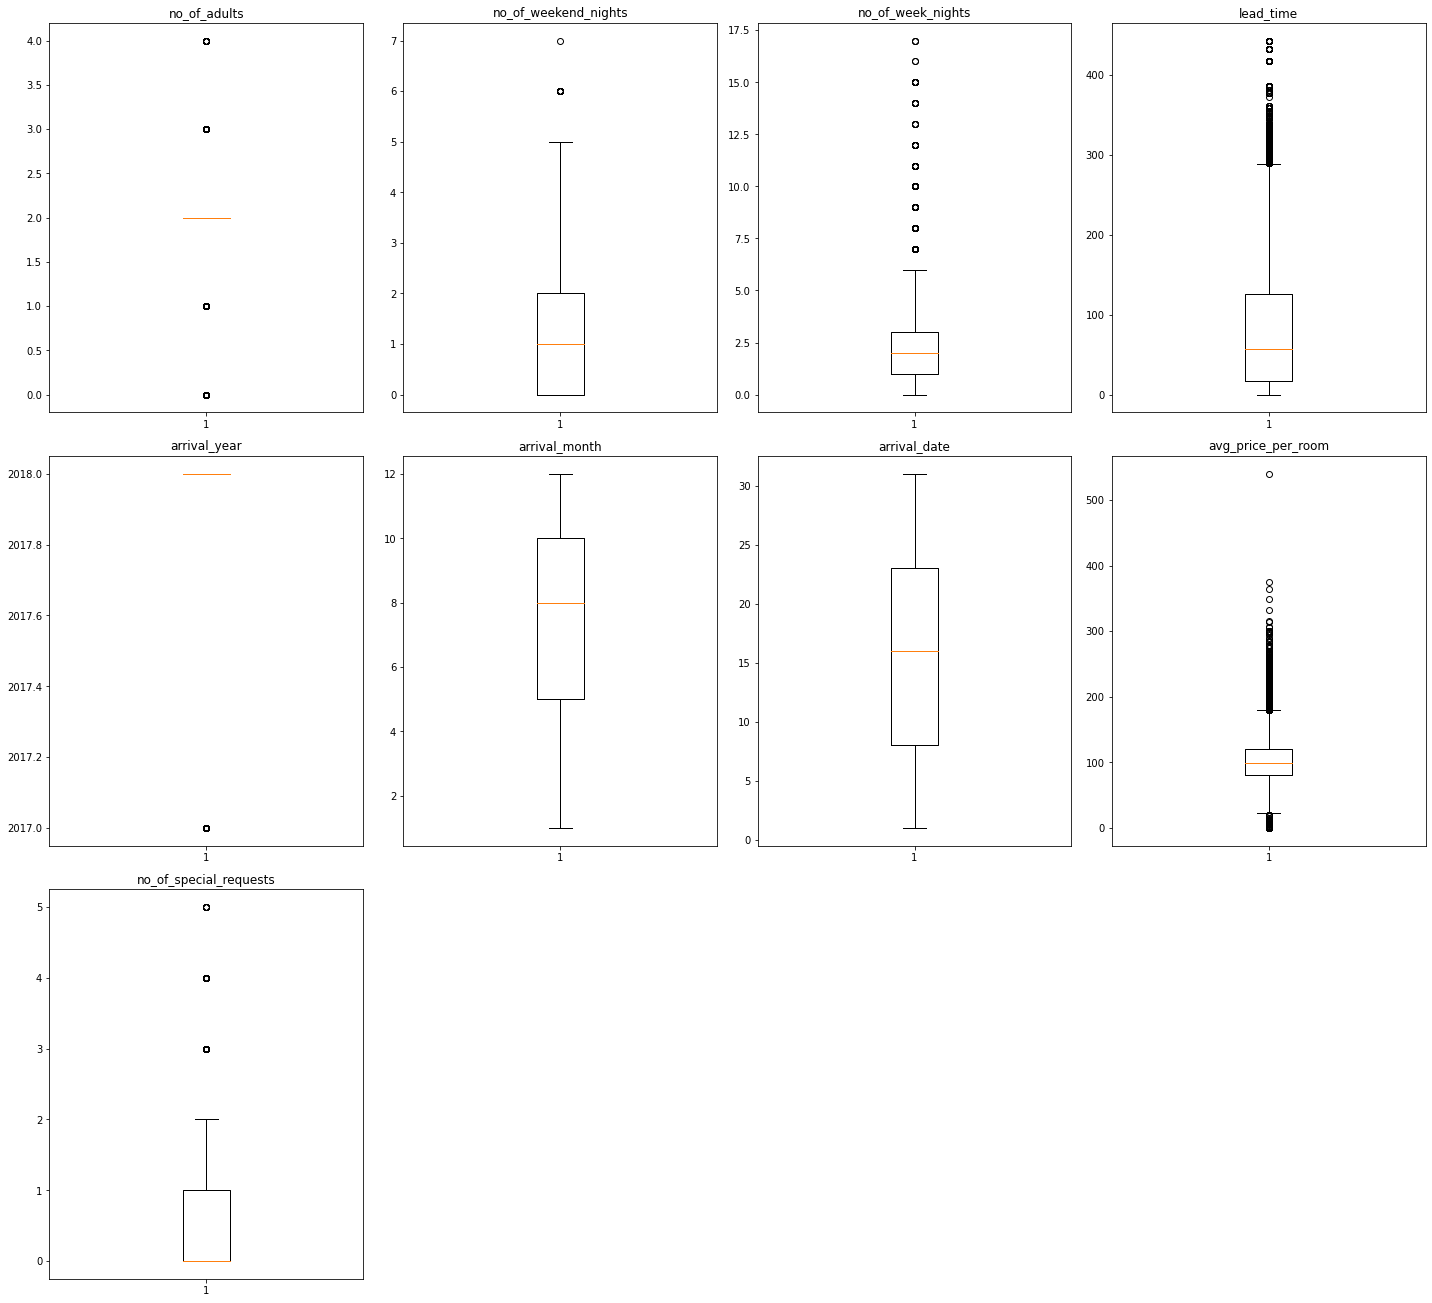

In [23]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [24]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [25]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

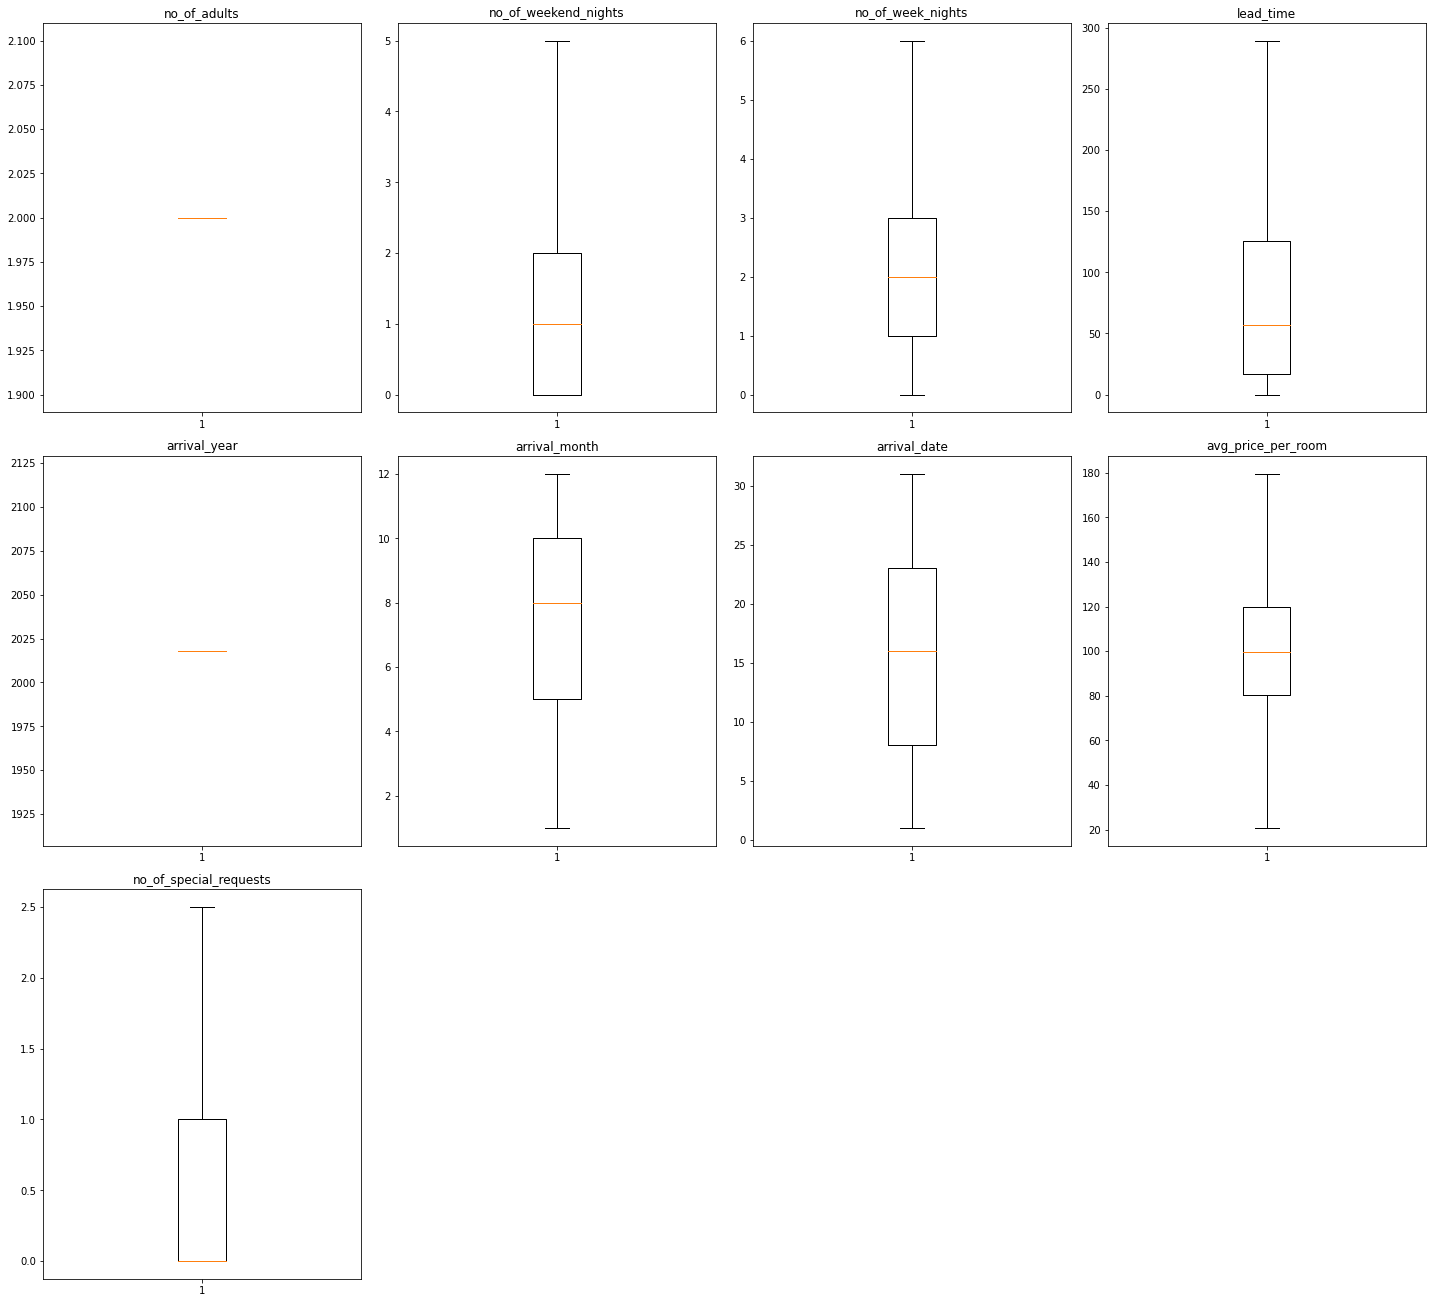

In [26]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for Modeling

In [27]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**Creating training and test set**

In [15]:
# specifying the independent  and dependent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [16]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 31)
Shape of test set :  (10883, 31)
Percentage of classes in training set:
0    1.0
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    1.0
Name: booking_status, dtype: float64


In [ ]:
X_train

## Model Building - Logistic Regression

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [18]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25362
Method:                           MLE   Df Model:                           29
Date:                Tue, 30 Jul 2024   Pseudo R-squ.:                  0.3208
Time:                        22:28:09   Log-Likelihood:                -10929.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
no_of_adults                                  0.0003   1.64e+05   2.02e-09      1.000   -3.22e+05    3.22e+05
no_of_weekend_nights                  

**Observations**

- Negative values of the coefficient show that the probability of a booking to get canceled decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of a booking to get canceled increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Model Performance Evaluation

**Model can make wrong predictions as**:

1. Predicting a booking status as cancelled but in reality the booking status is not cancelled.
2. Predicting a booking status as not cancelled but in reality the booking status is cancelled.

**Which case is more important?**

* Both the cases are important.

**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [19]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [20]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

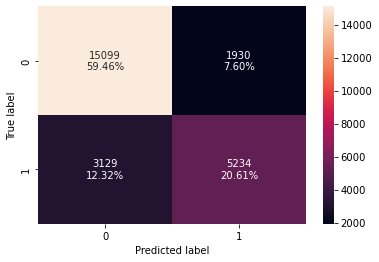

In [21]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [22]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.800764,0.625852,0.730597,0.67418


**Observations**

- The f1_score of the model is ~0.67 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### Detecting and Dealing with Multicollinearity

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [23]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                                  0.000000
no_of_weekend_nights                          1.049034
no_of_week_nights                             1.091255
lead_time                                     1.234799
arrival_year                                  0.000000
arrival_month                                 1.055013
arrival_date                                  1.006518
avg_price_per_room                            1.771767
no_of_special_requests                        1.234083
type_of_meal_plan_Meal Plan 2                 1.197394
type_of_meal_plan_Meal Plan 3                 1.025023
type_of_meal_plan_Not Selected                1.232626
room_type_reserved_Room_Type 2                1.032162
room_type_reserved_Room_Type 3                1.003222
room_type_reserved_Room_Type 4                1.298606
room_type_reserved_Room_Type 5                1.027844
room_type_reserved_Room_Type 6                1.222209
room_type_reserved_Room_Type 7

- * Sme categorical levels of `market_segment_type`, `repeated_guest`, and `booking_label` exhibit high multicollinearity

Removing `market_segment_type_Online`

In [25]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

no_of_adults                                  0.000000
no_of_weekend_nights                          1.048753
no_of_week_nights                             1.091227
lead_time                                     1.230575
arrival_year                                  0.000000
arrival_month                                 1.054732
arrival_date                                  1.006516
avg_price_per_room                            1.769812
no_of_special_requests                        1.226956
type_of_meal_plan_Meal Plan 2                 1.197336
type_of_meal_plan_Meal Plan 3                 1.025022
type_of_meal_plan_Not Selected                1.230683
room_type_reserved_Room_Type 2                1.032039
room_type_reserved_Room_Type 3                1.003222
room_type_reserved_Room_Type 4                1.296018
room_type_reserved_Room_Type 5                1.027844
room_type_reserved_Room_Type 6                1.222206
room_type_reserved_Room_Type 7

In [26]:
X_train2 = X_train1.drop("booking_label_Very Low", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

no_of_adults                                  0.000000
no_of_weekend_nights                          1.048749
no_of_week_nights                             1.091160
lead_time                                     1.229911
arrival_year                                  0.000000
arrival_month                                 1.053265
arrival_date                                  1.006469
avg_price_per_room                            1.769152
no_of_special_requests                        1.225065
type_of_meal_plan_Meal Plan 2                 1.197099
type_of_meal_plan_Meal Plan 3                 1.024750
type_of_meal_plan_Not Selected                1.230582
room_type_reserved_Room_Type 2                1.032031
room_type_reserved_Room_Type 3                1.003208
room_type_reserved_Room_Type 4                1.295613
room_type_reserved_Room_Type 5                1.027785
room_type_reserved_Room_Type 6                1.222036
room_type_reserved_Room_Type 7

In [28]:
X_train3 = X_train2.drop("repeated_guest_Yes", axis=1)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

no_of_adults                                 0.000000
no_of_weekend_nights                         1.048722
no_of_week_nights                            1.091155
lead_time                                    1.228748
arrival_year                                 0.000000
arrival_month                                1.053217
arrival_date                                 1.006197
avg_price_per_room                           1.768303
no_of_special_requests                       1.224039
type_of_meal_plan_Meal Plan 2                1.197080
type_of_meal_plan_Meal Plan 3                1.024728
type_of_meal_plan_Not Selected               1.230517
room_type_reserved_Room_Type 2               1.032014
room_type_reserved_Room_Type 3               1.003186
room_type_reserved_Room_Type 4               1.295550
room_type_reserved_Room_Type 5               1.027695
room_type_reserved_Room_Type 6               1.222025
room_type_reserved_Room_Type 7               1.

In [29]:
logit2 = sm.Logit(y_train, X_train3.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train3, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80041,0.625374,0.729937,0.673622


* No significant change in the model performance.

In [30]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Tue, 30 Jul 2024   Pseudo R-squ.:                  0.3201
Time:                        23:18:44   Log-Likelihood:                -10941.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
no_of_adults                               -3.59e-05   5.69e+04  -6.31e-10      1.000   -1.12e+05    1.12e+05
no_of_weekend_nights                  

### Removing high p-value variables

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [31]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train3[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_weekend_nights', 'lead_time', 'arrival_year', 'arrival_month', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'booking_label_Low', 'cancellation_label_Frequent Cancellations', 'cancellation_label_No Cancellations']


In [32]:
X_train4 = X_train3[selected_features]

In [33]:
logit3 = sm.Logit(y_train, X_train4.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25375
Method:                           MLE   Df Model:                           16
Date:                Tue, 30 Jul 2024   Pseudo R-squ.:                  0.3189
Time:                        23:21:38   Log-Likelihood:                -10960.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
no_of_weekend_nights                          0.1246      0.019      6.430      0.000       0.087       0.163
lead_time                             

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train4* as the final ones and *lg3* as final model.**

### Coefficient Interpretations

* Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary.

* Coefficient of age, fnlwgt, marital_status, working_hours_per_week, some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [34]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train4.columns).T

,no_of_weekend_nights,lead_time,arrival_year,arrival_month,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline,booking_label_Low,cancellation_label_Frequent Cancellations,cancellation_label_No Cancellations
Odds,1.132666,1.017189,0.997876,0.941946,1.022091,0.228078,1.440899,0.712628,0.780247,0.515438,0.573017,0.58000,0.419374,0.169340,0.120271,7.865368,3.883472
Change_odd%,13.266605,1.718883,-0.212364,-5.805406,2.209075,-77.192193,44.089856,-28.737181,-21.975338,-48.456192,-42.698344,-42.00002,-58.062577,-83.065999,-87.972905,686.536767,288.347169


### Checking performance of the new model

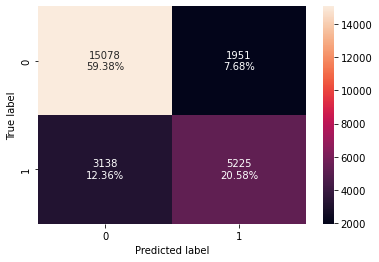

In [35]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train4, y_train)

In [36]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train4, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.799583,0.624776,0.728122,0.672501


**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [37]:
X_test4 = X_test[list(X_train4.columns)]

In [43]:
print(X_train4.columns)
print(X_test4.columns)

Index(['no_of_weekend_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'booking_label_Low', 'cancellation_label_Frequent Cancellations',
       'cancellation_label_No Cancellations'],
      dtype='object')
Index(['no_of_weekend_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
  

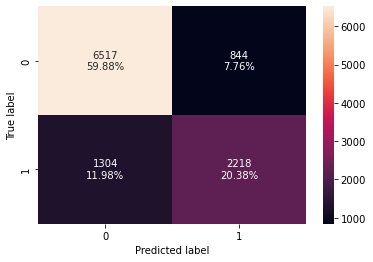

In [38]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test4, y_test)

In [39]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test4, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.802628,0.629756,0.724363,0.673755


- The model is giving a good f1_score of ~0.6725 and ~0.6737 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

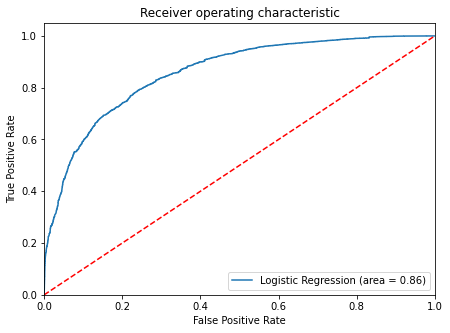

In [45]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train4))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [46]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.30693474817331534


**Checking model performance on training set**

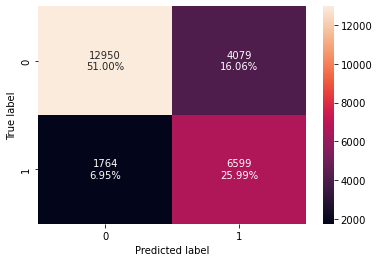

In [47]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train4, y_train, threshold=optimal_threshold_auc_roc
)

In [48]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train4, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.769888,0.789071,0.618,0.693136


- Recall has increased, accuracy and precision has reduced.
* The model is still giving a good performance.

**Checking model performance on test set**

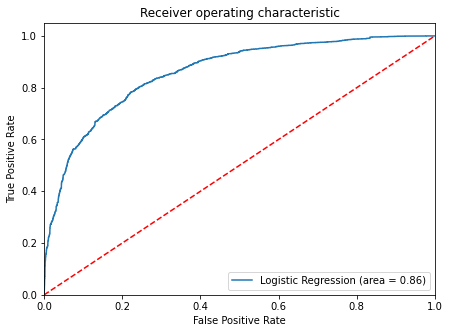

In [49]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

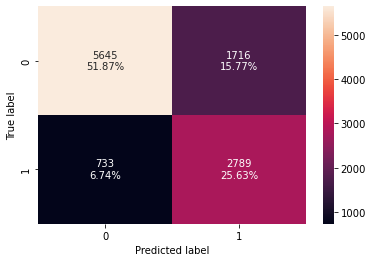

In [50]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test4, y_test, threshold=optimal_threshold_auc_roc)

In [51]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test4, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.77497,0.79188,0.61909,0.694905


### Precision-Recall Curve

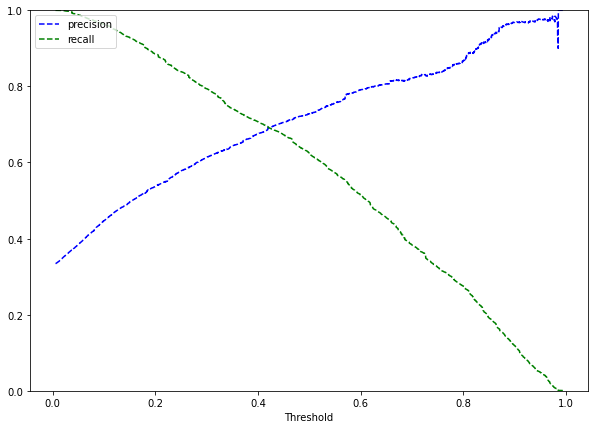

In [52]:
y_scores = lg3.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [54]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

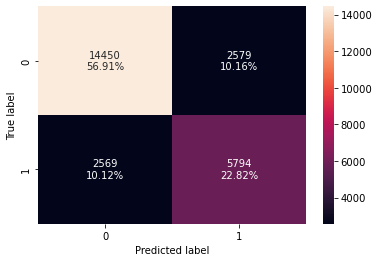

In [55]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train4, y_train, threshold=optimal_threshold_curve)

In [56]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train4, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.797259,0.692814,0.691986,0.6924


* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.42 as the optimal threshold.

**Checking model performance on test set**

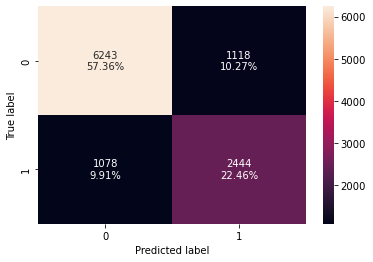

In [57]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test4, y_test, threshold=optimal_threshold_curve)

In [58]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test4, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.798217,0.693924,0.686131,0.690006


## Model Performance Comparison and Final Model Selection

In [59]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.81 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.81 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.799583,0.769888,0.797259
Recall,0.624776,0.789071,0.692814
Precision,0.728122,0.618000,0.691986
F1,0.672501,0.693136,0.692400


- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a threshold (0.81) is giving the best F1 score. Therefore it can be selected as the final model.

# KNN Classifier

In [28]:
# specifying the independent  and dependent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

X.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes,booking_label_Low,booking_label_Medium,booking_label_Very High,booking_label_Very Low,cancellation_label_Frequent Cancellations,cancellation_label_Moderate Cancellations,cancellation_label_No Cancellations
0,2.0,1.0,2.0,224.0,2018.0,10.0,2.0,65.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,2.0,3.0,5.0,2018.0,11.0,6.0,106.68,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,2.0,1.0,1.0,2018.0,2.0,28.0,60.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.0,0.0,2.0,211.0,2018.0,5.0,20.0,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,1.0,1.0,48.0,2018.0,4.0,11.0,94.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Normalizing the numerical variables

In [29]:
num_columns = ['lead_time', 'avg_price_per_room']

In [32]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(X[num_columns])

# Transform selected columns in X using the fitted scaler

X[num_columns] = scaler.transform(X[num_columns])

In [33]:
X.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes,booking_label_Low,booking_label_Medium,booking_label_Very High,booking_label_Very Low,cancellation_label_Frequent Cancellations,cancellation_label_Moderate Cancellations,cancellation_label_No Cancellations
0,2.0,1.0,2.0,1.717432,2018.0,10.0,2.0,-1.198524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,2.0,3.0,-0.964558,2018.0,11.0,6.0,0.117100,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,2.0,1.0,-1.013544,2018.0,2.0,28.0,-1.356349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.0,0.0,2.0,1.558227,2018.0,5.0,20.0,-0.093753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,1.0,1.0,-0.437957,2018.0,4.0,11.0,-0.267360,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Train Test Split

In [34]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [35]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 30)
Shape of test set :  (10883, 30)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


## Model Building

### Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a booking will not get cancelled but in reality, the booking gets cancelled (FN)
- Predicting a booking will get cancelled but in reality, the booking does not cancell (FP)

**Which case is more important?**

- If we predict that a booking will not get cancelled but in reality, the guest cancelles the booking, then the hotel company has to face losses due to cancellation of booking in following ways
    - the hotel cannot resell the room.
    - Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
    - Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
    - Human resources to make arrangements for the guests.

- If we predict that a booking will get cancelled but in reality, the guest does not cancelles the booking, then the company will have to bear the cost of inspection
    - Due to wrong prediction the booking will not take place and then hotel takecare cost will increase.
    

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [36]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [37]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### K- Nearest Neighbor

In order to optimize our model, it's essential to experiment with different values of k to find the most suitable fit for our data. We can commence this process by setting k equal to 3 and gradually exploring other values to assess their impact on the model's performance.

- We'll only consider odd values of K as the classification will be done based on majority voting.

#### K=3

In [38]:
# instantiate learning model (k = 3)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

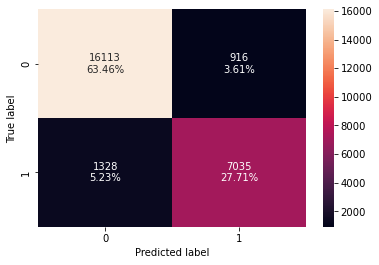

In [39]:
confusion_matrix_sklearn(knn_3, X_train, y_train)

In [40]:
knn_perf_train_3 = model_performance_classification_sklearn(
    knn_3, X_train, y_train
)
knn_perf_train_3

,Accuracy,Recall,Precision,F1
0,0.911626,0.841205,0.884794,0.862449


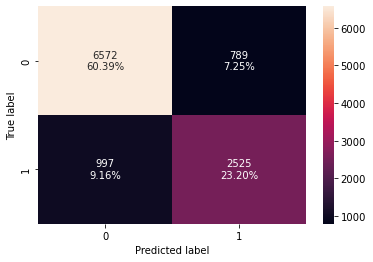

In [41]:
confusion_matrix_sklearn(knn_3, X_test, y_test)

In [42]:
knn_perf_test_3 = model_performance_classification_sklearn(
    knn_3, X_test, y_test
)
knn_perf_test_3

,Accuracy,Recall,Precision,F1
0,0.835891,0.716922,0.761919,0.738736


Let's run the KNN with no of neighbours to be 1,3,5..19 and find the optimal number of neighbours from the above list using the recall score

#### K with different values

In [44]:
# creating odd list of K for KNN
# myList = list(range(2,20))

# subsetting just the odd ones
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # evaluate recall on train and test
    scores_train = recall_score(y_train, y_pred_train)
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(scores_test)

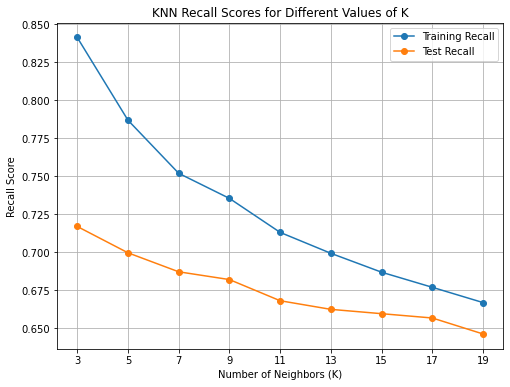

In [45]:
import matplotlib.pyplot as plt

# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

### Naive Bayes

In [46]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

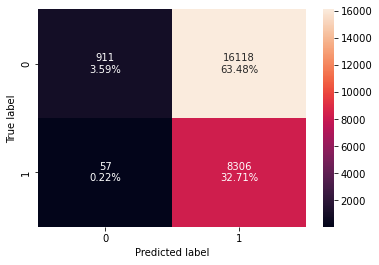

In [47]:
confusion_matrix_sklearn(nb, X_train, y_train)

In [48]:
nb_perf_train = model_performance_classification_sklearn(
    nb, X_train, y_train
)
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.362988,0.993184,0.340075,0.506664


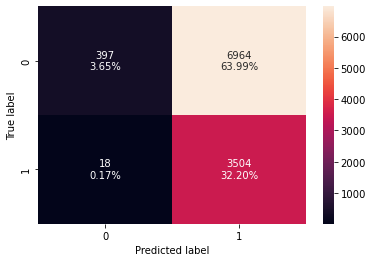

In [49]:
confusion_matrix_sklearn(nb, X_test, y_test)

In [50]:
nb_perf_test = model_performance_classification_sklearn(
    nb, X_test, y_test
)
nb_perf_test

,Accuracy,Recall,Precision,F1
0,0.358449,0.994889,0.334734,0.500929


## Comparison of Models and Final Model Selection

In [51]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        knn_perf_train_3.T,
        nb_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,K Nearest Neighbor k=3,Naive Bayes
Accuracy,0.911626,0.362988
Recall,0.841205,0.993184
Precision,0.884794,0.340075
F1,0.862449,0.506664


In [52]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        knn_perf_test_3.T,
        nb_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,K Nearest Neighbor k=3,Naive Bayes
Accuracy,0.835891,0.358449
Recall,0.716922,0.994889
Precision,0.761919,0.334734
F1,0.738736,0.500929


- In both the training and test sets, the K Nearest Neighbor model with k=3 demonstrates the highest recall among all compared models. This indicates that the model with k=3 is better at correctly identifying positive instances compared to the models with different k values and Naive Bayes.

- Naive Bayes consistently shows lower recall values compared to K Nearest Neighbor models with different k values. This suggests that Naive Bayes may struggle to capture positive instances as effectively as K Nearest Neighbor models in both training and test datasets, highlighting potential limitations in its performance for this specific task.